# Tutorial: CUDS API

<figure style="display: table; text-align:center; margin-left: auto; margin-right:auto">

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/simphony/docs/master?filepath=docs%2Fsource%2Fjupyter%2Fwrapper_development.ipynb "Click to run the tutorial yourself!")
    
</figure>

This tutorial introduces the CUDS API. The code given here is based on [this](https://github.com/simphony/osp-core/blob/master/examples/api_example.py) example.


## Background

CUDS stands for Common Universal Data Structure, and it is used to uniformly represent ontology individuals. In the python implementation of OSP-core, it means that every ontology individual is an instance of the `Cuds` class.

As every CUDS object is an ontology individual, each CUDS is related to an ontology class via the ontological `is a` relation, and can be connected to other CUDS objects through ontology relationships. In the python implementation of OSP-core, all such ontological classes are instances of the `OntologyClass` class, which is itself a subclass of `OntologyEntity`. The ontology entitites are organized in namespaces.

In OSP-core, the ontology relationships can be tagged as active or passive relationships. This is done in the ontology installation file. Such feature lets CUDS objects act as containers, so that content of a CUDS object consists of other CUDS objects. This means that a CUDS is a [recursive data structure](https://en.wikipedia.org/wiki/Recursive_data_type). Such active and passive relationships are directed, meaning that they have a source and a target. If a CUDS is the source of a connection via an active relationship to another CUDS, then the former contains the latter. Conversely, if a passive relationship is used, then the latter is contained in the former. Untagged ontology relationships do not define any containment.

**Note:** currently, each time a source CUDS object is connected to another target CUDS object through an active relationship, an inverse passive relationship is also created, connecting the target CUDS (acting as source) and the source CUDS (acting as target).

<figure style="display: table; text-align:center; margin-left: auto; margin-right:auto">
  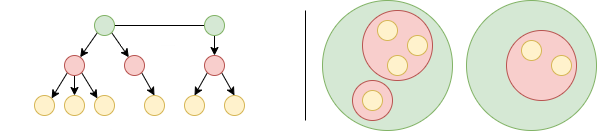
  <figcaption style="display: table-caption; caption-side: bottom; text-align:center">Containment in CUDS objects. On the graph view of the left hand side, the arrows depict active relationships, while the segment depicts any other untagged ontology relationship. On the right hand side, a containment view is provided.</figcaption>
</figure>

The most important functionalities that the CUDS data structure exposes as python methods are the following:

- `add`: Connects the current CUDS object to one or more CUDS objects through a specific ontology relationship. If the chosen relationship is not an active relationship, one CUDS will not contain the other nor viceversa.

- `remove`: Despite its name, it does NOT delete the CUDS object itself. Instead, it just disconnects the current CUDS object from one or more CUDS objects.

- `get`: Returns the CUDS objects connected to the current CUDS object through a specific ontology relationship. 

- `iter`: Similar to the `get` method, it just returns one CUDS objects at a time instead of all at once (python [iterator](https://python.land/deep-dives/python-iterator)), so that memory can be saved.

- `is_a`: Checks if the CUDS object is an instance of the given ontology class.

In addition, other important functionalities are exposed as python properties:

- `oclass`: The ontology class of the ontology individual represented by the CUDS object. If the individual belongs to multiple classes, only one of them is referenced by the property.

- `uid`: A unique ID identifying an ontology individual.

- `iri`: The [Internationalized Resource Identifier](https://fusion.cs.uni-jena.de/fusion/blog/2016/11/18/iri-uri-url-urn-and-their-differences/) of the CUDS object. It consists of a CUDS namespace prefix and the unique ID of the CUDS object. This will be further clarified in the tutorial.

- **attributes**: The values of the ontology attributes of an individual (also known as [data properties](https://www.w3.org/TR/owl2-syntax/#Data_Properties) in [OWL](https://en.wikipedia.org/wiki/Web_Ontology_Language)) may also be accessed and modified as python properties of the CUDS objects. For example: `cuds_object.name = "Bob"`.

There are some advanced functionalities NOT covered in this tutorial. Among them, we highlight the `update` method, which is covered in the [wrapper tutorial](multiple-wrappers.ipynb), where it can be seen in action. For a complete list of available methods and properties, check the API reference. That whole set of methods and attributes constitutes the CUDS [API](https://en.wikipedia.org/wiki/API).

[//]: # (TODO: Link to API reference.)

## Let's get hands on
In this tutorial, we will work with the `city` namespace, the example namespace from OSP-core. It consists of concepts from the example [city ontology](https://github.com/simphony/osp-core/blob/master/osp/core/ontology/docs/city.ontology.yml).

[//]: # (TODO: simple graphical representation of the city ontology.)

The first step is to install the city ontology. Use the tool pico for this. If you want to know more about ontology installation, check the documentation on the [pico ontology installation tool](https://simphony.readthedocs.io/en/latest/utils.html#pico-installs-cuds-ontologies), [YAML ontology installation files](https://simphony.readthedocs.io/en/latest/yaml.html), and [installing OWL ontologies](https://simphony.readthedocs.io/en/latest/owl.html).

In [1]:
!pico install city

INFO 2021-04-01 13:40:41,433 [osp.core.ontology.installation]: Will install the following namespaces: ['city']
INFO 2021-04-01 13:40:41,448 [osp.core.ontology.yml.yml_parser]: Parsing YAML ontology file /home/jose/.local/lib/python3.9/site-packages/osp/core/ontology/docs/city.ontology.yml
INFO 2021-04-01 13:40:41,476 [osp.core.ontology.yml.yml_parser]: You can now use `from osp.core.namespaces import city`.
INFO 2021-04-01 13:40:41,476 [osp.core.ontology.parser]: Loaded 202 ontology triples in total
INFO 2021-04-01 13:40:41,491 [osp.core.ontology.installation]: Installation successful


Then you can import the `city` namespace.

In [2]:
# If you just installed the ontology from within this notebook and this line doesn't work, please restart the kernel and run this cell again.
from osp.core.namespaces import city

You are now creating some CUDS objects that you are going to use to try out the functionalities of the CUDS data structure.

In [3]:
c = city.City(name="Freiburg", coordinates=[47, 7])  # Ontology individual representing the city of Freiburg.
p1 = city.Citizen(name="Peter")  # Ontology indidual representing a specific person, "Peter".
p2 = city.Citizen(name="Anne")  # Ontology individual representing another specific person, "Anne".

The names `c, p1, p2` are assigned to the newly created CUDS objects. The keyword arguments `name` and `coordinates` let you directly assign values for such ontology attributes (also known as [data properties](https://www.w3.org/TR/owl2-syntax/#Data_Properties) in [OWL](https://en.wikipedia.org/wiki/Web_Ontology_Language)) to the new CUDS objects. The available ontology attributes for each ontology class depend on the specific class being instantiated. For example, the ontology attribute `name` is available for both the _City_ and the _Citizen_ ontology classes in the sample _City_ ontology. The attribute `coordinates` is available for the _City_ ontology class, but not for the _Citizen_ class.

### Functionalities exposed as python properties

Each CUDS object has a unique identifier (UID), which can be accessed using the `uid` property:

In [4]:
print("uid of c: " + str(c.uid))
print("uid of p1: " + str(p1.uid))
print("uid of p2: " + str(p2.uid))

uid of c: e0b721ae-6004-4834-80f1-e6e979952d1f
uid of p1: 63874785-0de6-43ad-8669-999482501ad1
uid of p2: 39c7334f-ef62-4dbc-ae2e-390d7f3ca641


Similarly, each CUDS object has an [IRI](https://fusion.cs.uni-jena.de/fusion/blog/2016/11/18/iri-uri-url-urn-and-their-differences/), which serves to reference it in the [Semantic Web](https://en.wikipedia.org/wiki/Semantic_Web) and improves the compatibility of the CUDS format with the [Resource Description Framework](https://en.wikipedia.org/wiki/Resource_Description_Framework) data model. Note that the IRI of each CUDS object contains its unique identifier.

In [5]:
print("IRI of c: " + str(c.iri))
print("IRI of p1: " + str(p1.iri))
print("IRI of p2: " + str(p2.iri))

IRI of c: http://www.osp-core.com/cuds#e0b721ae-6004-4834-80f1-e6e979952d1f
IRI of p1: http://www.osp-core.com/cuds#63874785-0de6-43ad-8669-999482501ad1
IRI of p2: http://www.osp-core.com/cuds#39c7334f-ef62-4dbc-ae2e-390d7f3ca641


The class of the ontology individual represented by the CUDS object can be queried as well:

In [6]:
print("oclass of c: " + str(c.oclass))
print("oclass of p1: " + str(p1.oclass))
print("oclass of p2: " + str(p2.oclass))

oclass of c: city.City
oclass of p1: city.Citizen
oclass of p2: city.Citizen


The `uid`, `iri` and `oclass` properties **cannot be modified**.

Finally, the values of the ontology attributes of an individual can be easily **accessed and modified** using the dot notation.

In [7]:
print(f"Name of c: {c.name}. Coordinates of c: {c.coordinates}." )
print("Name of p1: " + str(p1.name))
print("Name of p2: " + str(p2.name))

print(f"\nChange the name of {p1.name}.")
p1.name = "Bob"
print(f"Name of p1: {p1.name}.")

Name of c: Freiburg. Coordinates of c: [47  7].
Name of p1: Peter
Name of p2: Anne

Change the name of Peter.
Name of p1: Bob.


### Functionalities exposed as python methods

Now, we may connect the two citizens to our city object:

In [8]:
c.add(p1, rel=city.hasInhabitant)
c.add(p2, rel=city.hasInhabitant)

<city.Citizen: 39c7334f-ef62-4dbc-ae2e-390d7f3ca641,  CoreSession: @0x7f3a5778ef70>

Note that the relationship type between the city and its two citizens in this case is 'hasInhabitant'. In our context, this means that Anne and Peter are Freiburg inhabitants. Moreover, in the [city ontology](https://github.com/simphony/osp-core/blob/master/osp/core/ontology/docs/city.ontology.yml), this relationship is defined as an active relationship. This means that Anne and Peter are not only connected to Freiburg, but are also contained in the Freiburg CUDS object.

Next, we would like to iterate over the objects contained in the city object. We do so by using the `iter` function:


In [9]:
for el in c.iter():
    print("uid: " + str(el.uid))

uid: 63874785-0de6-43ad-8669-999482501ad1
uid: 39c7334f-ef62-4dbc-ae2e-390d7f3ca641


We can `get` a target object from a CUDS object if we have a UID of one of its immediate contained objects. This will not work if the target object is not contained in the CUDS object, but just connected to it.

In [10]:
print(c.get(p1.uid))  # `p1`is contained in `c` because they are connected through an active relationship.
print(p1.get(c.uid))  # `c` is connected to `p1`, but it is NOT contained in `p1`.

city.Citizen: 63874785-0de6-43ad-8669-999482501ad1
None


We can also filter the contained objects by type: 

In [11]:
print(c.get(oclass=city.Citizen))

[<city.Citizen: 63874785-0de6-43ad-8669-999482501ad1,  CoreSession: @0x7f3a5778ef70>, <city.Citizen: 39c7334f-ef62-4dbc-ae2e-390d7f3ca641,  CoreSession: @0x7f3a5778ef70>]


We remove objects using the `remove()` function. Despite its name, this just disconnects the target object from the CUDS, but does NOT delete the target object from the memory.

In [12]:
c.remove(p1)
# c.remove(p1.uid) also works!
print(p1)  # `p1` still exists,
print(c.get(p1.uid))  # but is no longer connected neither contained in `c`.

city.Citizen: 63874785-0de6-43ad-8669-999482501ad1
None


Let's close this tutorial by adding some neighborhoods in a loop,

In [13]:
for i in range(6):
    c.add(city.Neighborhood(name="neighborhood %s" % i))

and then verifying that they are indeed neighborhoods, just to also try the `is_a` method.



In [14]:
all(n.is_a(city.Neighborhood) for n in c.get(oclass=city.Neighborhood))

True

The existing ontology individuals and the relationships among them have been depicted below, using the utility `pretty_print` (see the [Utilities section](https://simphony.readthedocs.io/en/latest/utils.html?highlight=pretty_print)). Note that some attributes that were not specified were set automatically to the default values specified in the ontology.

In [15]:
from osp.core.utils import pretty_print
pretty_print(c)

- Cuds object named <Freiburg>:
  uuid: e0b721ae-6004-4834-80f1-e6e979952d1f
  type: city.City
  superclasses: city.City, city.GeographicalPlace, city.PopulatedPlace, cuba.Entity
  values: coordinates: [47  7]
  description: 
    To Be Determined

   |_Relationship city.hasInhabitant:
   | -  city.Citizen cuds object named <Anne>:
   |    uuid: 39c7334f-ef62-4dbc-ae2e-390d7f3ca641
   |    age: 25
   |_Relationship city.hasPart:
     -  city.Neighborhood cuds object named <neighborhood 0>:
     .  uuid: 79eec4f9-55c5-464d-b6c3-dc4382e55476
     .  coordinates: [0 0]
     -  city.Neighborhood cuds object named <neighborhood 1>:
     .  uuid: 50fa8dac-2f5f-4b2c-ab8a-24f7f1b41f2c
     .  coordinates: [0 0]
     -  city.Neighborhood cuds object named <neighborhood 2>:
     .  uuid: f6c20bfa-c29b-46bb-a5f5-8bc88b3e3621
     .  coordinates: [0 0]
     -  city.Neighborhood cuds object named <neighborhood 3>:
     .  uuid: e161ea1c-40d8-4556-93ad-dfd4d178d669
     .  coordinates: [0 0]
     -  